# Lecture 02: ML Foundations

**Slides:** `02_ML_Foundations.pdf`

## What you will learn
- A first end-to-end ML workflow on toy data
- Generalization and the train/test split
- Geometric intuition (norms) and probability basics

## Notes
Focuses on core concepts used throughout the rest of the course.

## How to use this notebook
1. Run the **Setup** cell below (it will detect the repository root and set paths).
2. Run cells top-to-bottom. If a cell takes too long, skim it and continue — the goal is to learn the workflow, not to optimize runtime.

In [ ]:
# --- Setup (run this first) ---
from __future__ import annotations

import os
import sys
from pathlib import Path
from typing import Optional

def _find_repo_root(start: Optional[Path] = None) -> Path:
    """Find repo root by walking upwards and looking for common markers."""
    start = (start or Path.cwd()).resolve()
    for p in [start] + list(start.parents):
        if (p / "pyproject.toml").exists() and (p / "src").exists():
            return p
        if (p / "slides").exists() and (p / "notebooks").exists():
            return p
    return start

PROJECT_ROOT = _find_repo_root()
os.chdir(PROJECT_ROOT)

# Make `import aml_course` work without installing the package.
SRC_DIR = PROJECT_ROOT / "src"
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

# Common paths used in the course.
DATA_DIR = PROJECT_ROOT / "data"
FIGURES_DIR = PROJECT_ROOT / "pictures"
MODELS_DIR = PROJECT_ROOT / "models"

DATA_DIR.mkdir(parents=True, exist_ok=True)
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)

print(f"📁 Project root: {PROJECT_ROOT}")
print(f"📦 Data dir:     {DATA_DIR}")
print(f"🖼️  Figures dir:  {FIGURES_DIR}")
print(f"🤖 Models dir:   {MODELS_DIR}")


## Part 1 — A first end-to-end classification workflow

We build a tiny supervised-learning example end-to-end: create a dataset, split into train/test, fit a model, and evaluate it with accuracy and a classification report.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Sample data
data = {
    'X1': [2, 3, 5, 7, 9, 6, 4, 8, 1, 0],
    'X2': [1, 4, 7, 2, 8, 3, 5, 0, 6, 9],
    'Y': [0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
}

In [3]:
# Creating a DataFrame
df = pd.DataFrame(data)

# Splitting the data into features and target variable
X = df[['X1', 'X2']]
y = df['Y']

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


In [5]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



## Part 2 — Geometry: p-norms and unit balls

Visualizing different norms helps build intuition for distance-based methods (e.g., k-NN) and regularization (e.g., L1 vs L2).

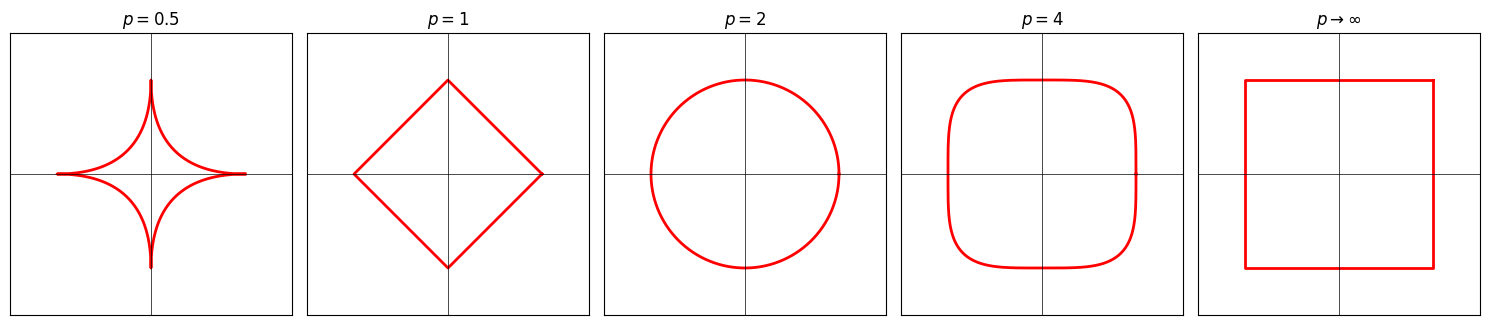

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define p values for different norms
p_values = [0.5, 1, 2, 4, 100]
labels = [r'$p=0.5$', r'$p=1$', r'$p=2$', r'$p=4$', r'$p \to \infty$']

fig, axes = plt.subplots(1, len(p_values), figsize=(15, 4))

theta = np.linspace(0, 2 * np.pi, 1000)

for ax, p, label in zip(axes, p_values, labels):
    if p == 100:  # Approximate p = infinity
        x = np.array([1, -1, -1, 1, 1])
        y = np.array([1, 1, -1, -1, 1])
    else:
        x = np.sign(np.cos(theta)) * np.abs(np.cos(theta))**(2/p)
        y = np.sign(np.sin(theta)) * np.abs(np.sin(theta))**(2/p)
    
    ax.plot(x, y, 'r', linewidth=2)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

plt.tight_layout()
# plt.savefig("lp_norm_unit_balls.pdf")
plt.show()

## Part 3 — Probability: the Central Limit Theorem (simulation)

We simulate repeated sampling to illustrate how sums/averages of random variables tend to look Gaussian as the sample size grows.

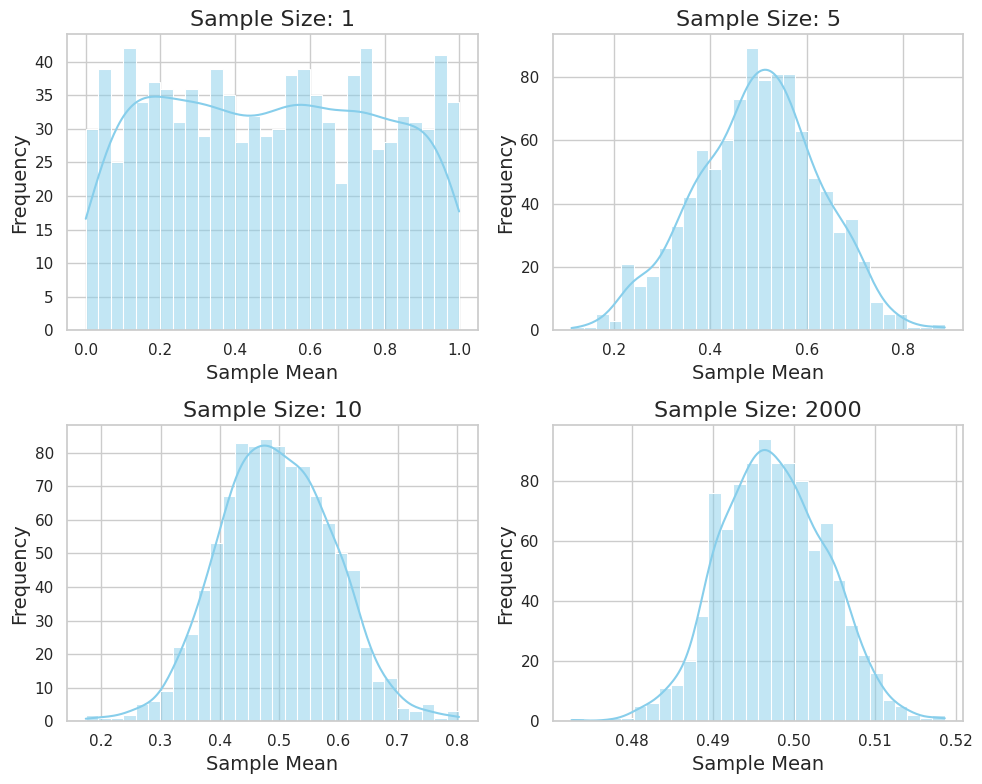

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

# Step 1: Choose a distribution 
# You can try different distributions
size = 10000
# original_distribution = np.random.exponential(1.0, size)
original_distribution = np.random.uniform(0, 1, size)
# original_distribution = np.random.binomial(10, 0.5, size)

# Step 2 & 3: Generate samples and calculate their means
sample_sizes = [1, 5, 10, 2000]  # Different sample sizes
mean_of_samples = {sample_size: [np.mean(np.random.choice(original_distribution, sample_size))
                                  for _ in range(1000)] for sample_size in sample_sizes}

# Step 4: Plot the distribution of these sample means
plt.figure(figsize=(10, 8))
for i, sample_size in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)
    sns.histplot(mean_of_samples[sample_size], kde=True, color='skyblue', bins=30)
    plt.title(f'Sample Size: {sample_size}', fontsize=16)
    plt.xlabel('Sample Mean', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()

plt.savefig('pictures/central_limit_theorem.pdf')

plt.show()
